In [1]:
import sys
import os
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pickle import dump,load
import time
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.distributions.multivariate_normal import  MultivariateNormal
parent_dir = os.path.abspath(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir))
sys.path.insert(0, parent_dir)
import gptransform

In [2]:
init_param_bounds = torch.zeros((8,2))

### Width Function Params ###

# Ell
init_param_bounds[0,1] = 2.5
init_param_bounds[0,0] = 0.1

# Max
init_param_bounds[1,1] = 4
init_param_bounds[1,0] = 0.2

# Slope
init_param_bounds[2,1] = 10
init_param_bounds[2,0] = 1

# Loc
init_param_bounds[3,1] = 6
init_param_bounds[3,0] = 0.5

# Decay
init_param_bounds[4,1] = 1
init_param_bounds[4,0] = 0.05

### Experimental Noise ###

# Sigma_n
init_param_bounds[5,1] = 0.5
init_param_bounds[5,0] = 0.0001

### Non-Bonded Peaks in Mean ###

# r_0
init_param_bounds[6,1] = 6
init_param_bounds[6,0] = 0.5

# s
init_param_bounds[7,1] = 50
init_param_bounds[7,0] = 0.1

init_params = torch.sum(init_param_bounds,dim=1)/2

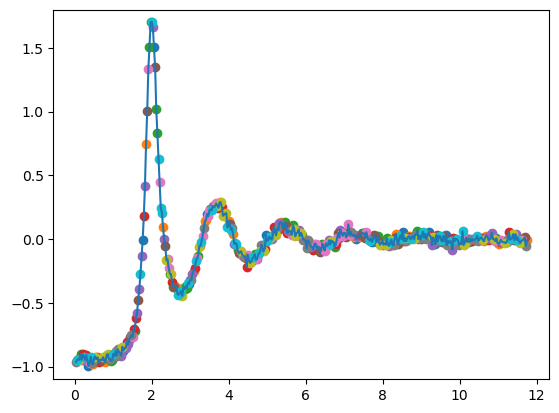

In [3]:
r_grid =  torch.linspace(0.0001, 50, 1000).reshape(-1,1)
r_infer = torch.linspace(0.0001, 40, 400).reshape(-1,1)

my_data = np.genfromtxt("Yarnell_Sq_Ar_1973.csv", delimiter=',')
q_train = torch.unsqueeze(torch.tensor(my_data.T[0]),dim=1)[1:].float()
sq_train = torch.unsqueeze(torch.tensor(my_data.T[1]),dim=1)[1:].float() - 1 + torch.normal(0, 0.025, size=q_train.size())

my_data = np.genfromtxt("Yarnell_gr_Ar_1973.csv", delimiter=',')
r_reported = torch.unsqueeze(torch.tensor(my_data.T[0]),dim=1)[1:].float()
gr_reported = torch.unsqueeze(torch.tensor(my_data.T[1]),dim=1)[1:].float()

q_infer = q_train

perm = torch.randperm(len(q_train))

# Put into PyTorch Dataloader
dataset = gptransform.data(q_train[perm].reshape(10,40,1),sq_train[perm].reshape(10,40,1))

for batch, (X, y) in enumerate(dataset):
    # Compute prediction and loss
    plt.scatter(X[0], y[0],label="Batch # " + str(batch))
plt.plot(q_train,sq_train)
plt.ylim(-1.1,1.8)
#plt.legend()
plt.show()

In [4]:
gp = gptransform.GP(init_params,init_param_bounds,0,0.02125,5_000)
gp.print_params()

l:       1.300000 
max:     2.100000 
slope:   5.500000 
loc:     3.250000 
decay:   0.525000 
sigma_n: 0.250050 
r_0:     3.250000 
s:       25.050001 


Average loss: -3.457307  [    0/  250]
l:       1.298358 
max:     2.099804 
slope:   5.500704 
loc:     3.257406 
decay:   0.525220 
sigma_n: 0.248234 
r_0:     3.255449 
s:       25.050192 
Minutes Taken Since Last Report: 0.053079 



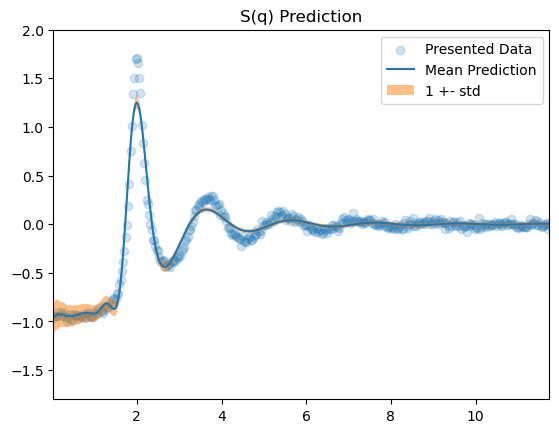

Average loss: -4.969821  [   10/  250]
l:       1.282067 
max:     2.098184 
slope:   5.509125 
loc:     3.330509 
decay:   0.527340 
sigma_n: 0.229254 
r_0:     3.304448 
s:       25.052479 
Minutes Taken Since Last Report: 0.525199 



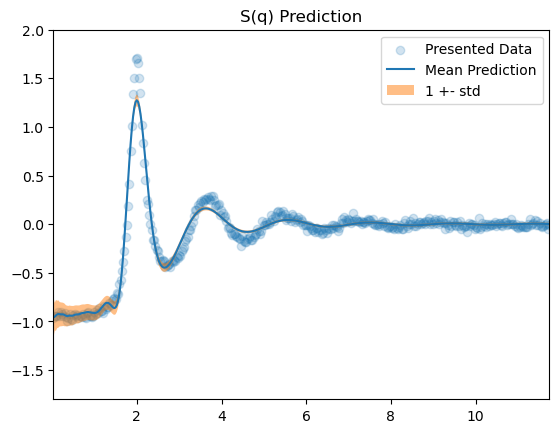

Average loss: -7.930183  [   20/  250]
l:       1.265770 
max:     2.097430 
slope:   5.519662 
loc:     3.395144 
decay:   0.529317 
sigma_n: 0.208965 
r_0:     3.341560 
s:       25.055384 
Minutes Taken Since Last Report: 0.537841 



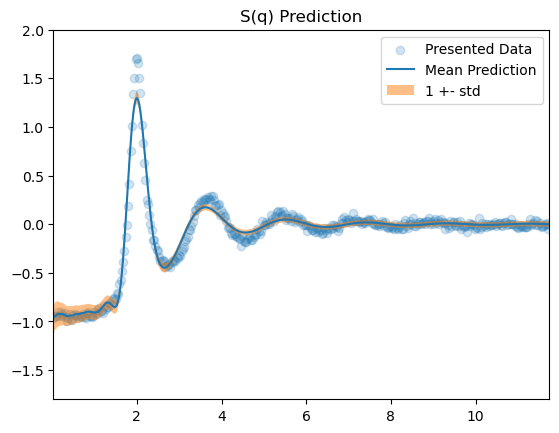

Average loss: -11.168761  [   30/  250]
l:       1.248993 
max:     2.097903 
slope:   5.531541 
loc:     3.444367 
decay:   0.531051 
sigma_n: 0.187827 
r_0:     3.366121 
s:       25.058826 
Minutes Taken Since Last Report: 0.534087 



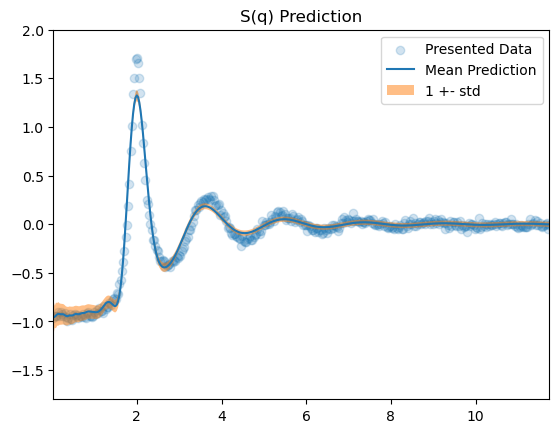

Average loss: -14.684367  [   40/  250]
l:       1.231279 
max:     2.099825 
slope:   5.544364 
loc:     3.477480 
decay:   0.532316 
sigma_n: 0.166482 
r_0:     3.380365 
s:       25.062851 
Minutes Taken Since Last Report: 0.534604 



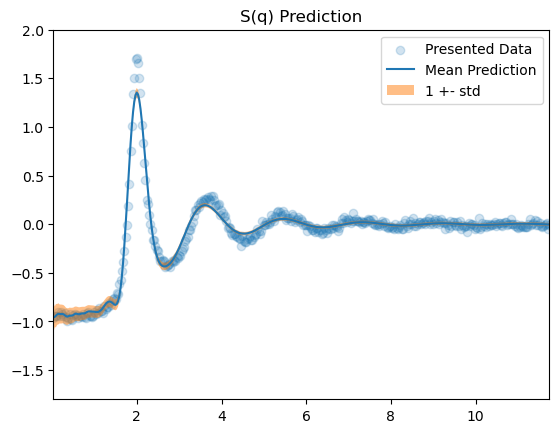

Average loss: -18.472361  [   50/  250]
l:       1.212310 
max:     2.103284 
slope:   5.558461 
loc:     3.498174 
decay:   0.532830 
sigma_n: 0.145643 
r_0:     3.388108 
s:       25.067648 
Minutes Taken Since Last Report: 0.537256 



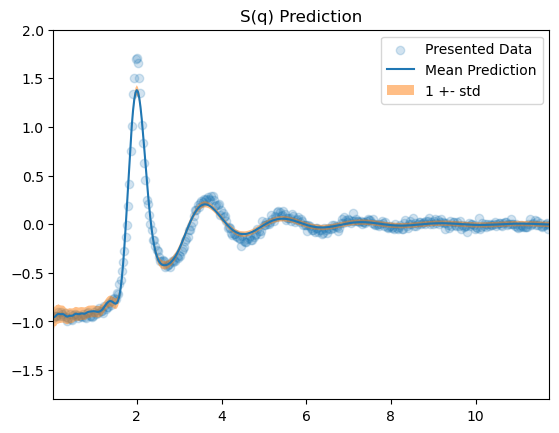

Average loss: -22.486229  [   60/  250]
l:       1.191886 
max:     2.108330 
slope:   5.574731 
loc:     3.510897 
decay:   0.532284 
sigma_n: 0.125983 
r_0:     3.393090 
s:       25.073524 
Minutes Taken Since Last Report: 0.541446 



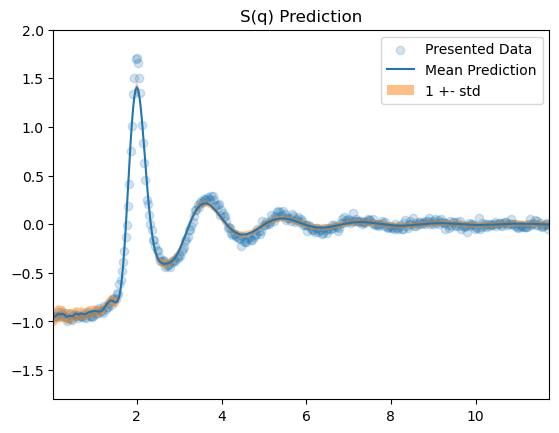

Average loss: -26.635434  [   70/  250]
l:       1.169847 
max:     2.115004 
slope:   5.594390 
loc:     3.518795 
decay:   0.530428 
sigma_n: 0.108046 
r_0:     3.398050 
s:       25.080931 
Minutes Taken Since Last Report: 0.565370 



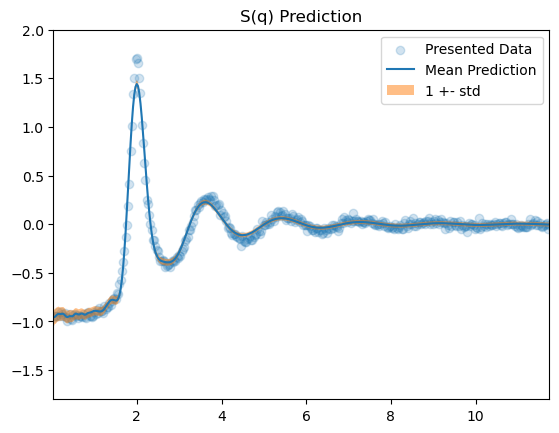

Average loss: -30.812565  [   80/  250]
l:       1.145945 
max:     2.123344 
slope:   5.618877 
loc:     3.524002 
decay:   0.527092 
sigma_n: 0.092174 
r_0:     3.404482 
s:       25.090412 
Minutes Taken Since Last Report: 0.584411 



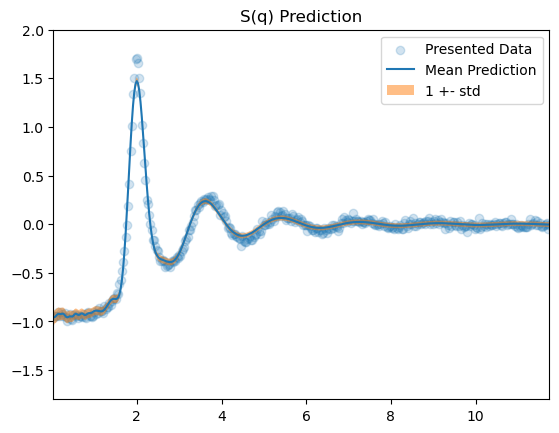

Average loss: -34.911499  [   90/  250]
l:       1.119802 
max:     2.133360 
slope:   5.649645 
loc:     3.528111 
decay:   0.522222 
sigma_n: 0.078481 
r_0:     3.412479 
s:       25.102587 
Minutes Taken Since Last Report: 0.571855 



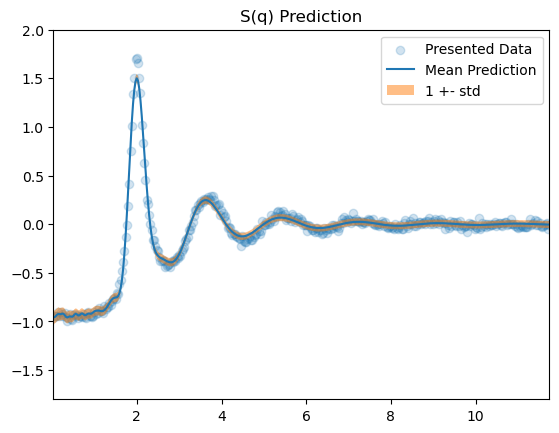

Average loss: -38.863913  [  100/  250]
l:       1.091216 
max:     2.144874 
slope:   5.687755 
loc:     3.531851 
decay:   0.516020 
sigma_n: 0.066889 
r_0:     3.420938 
s:       25.118002 
Minutes Taken Since Last Report: 0.568264 



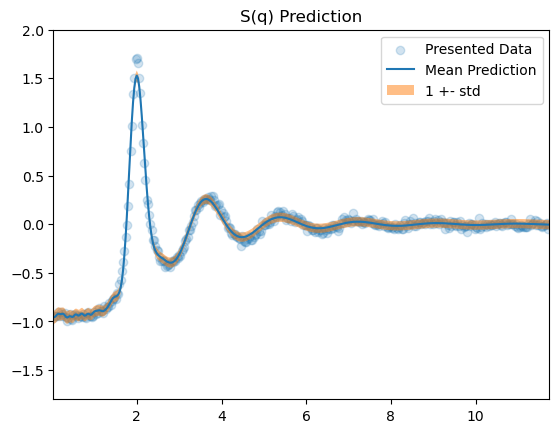

Average loss: -42.597726  [  110/  250]
l:       1.060838 
max:     2.157318 
slope:   5.733531 
loc:     3.535074 
decay:   0.508992 
sigma_n: 0.057243 
r_0:     3.428616 
s:       25.137020 
Minutes Taken Since Last Report: 0.568492 



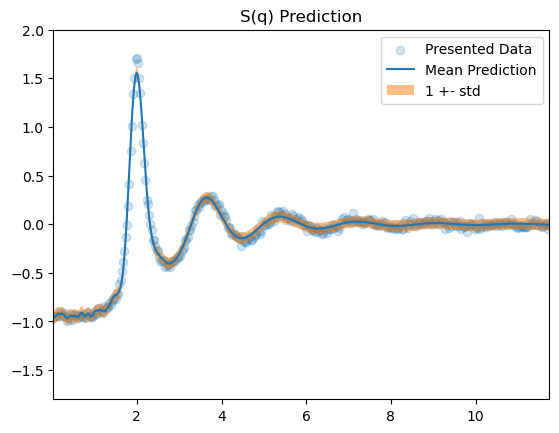

Average loss: -45.993204  [  120/  250]
l:       1.030637 
max:     2.169617 
slope:   5.786416 
loc:     3.536796 
decay:   0.501976 
sigma_n: 0.049392 
r_0:     3.434952 
s:       25.159769 
Minutes Taken Since Last Report: 0.560255 



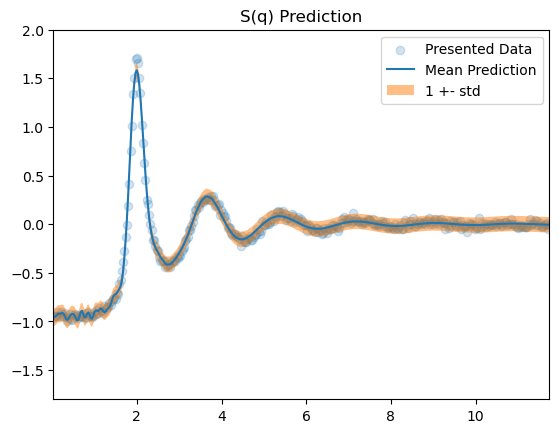

Average loss: -48.879685  [  130/  250]
l:       1.002743 
max:     2.180676 
slope:   5.845480 
loc:     3.536936 
decay:   0.495756 
sigma_n: 0.043197 
r_0:     3.440026 
s:       25.186211 
Minutes Taken Since Last Report: 0.529879 



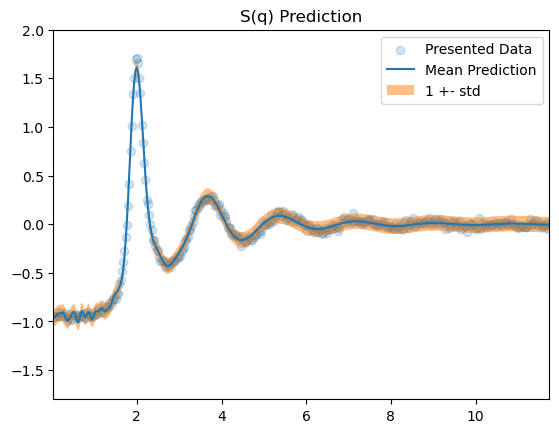

Average loss: -51.139665  [  140/  250]
l:       0.978213 
max:     2.189919 
slope:   5.909517 
loc:     3.536087 
decay:   0.490732 
sigma_n: 0.038460 
r_0:     3.444026 
s:       25.216066 
Minutes Taken Since Last Report: 0.542608 



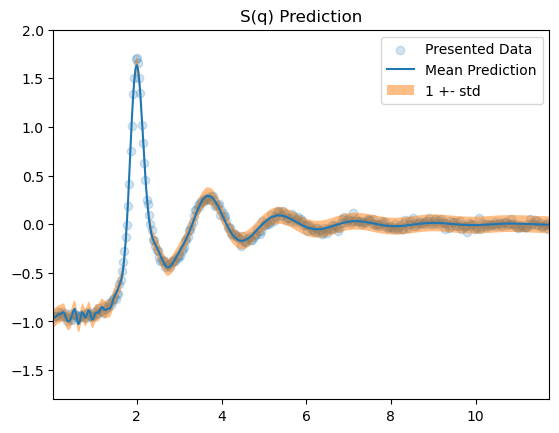

Average loss: -52.769475  [  150/  250]
l:       0.957062 
max:     2.197266 
slope:   5.976983 
loc:     3.534708 
decay:   0.486968 
sigma_n: 0.034937 
r_0:     3.447126 
s:       25.248777 
Minutes Taken Since Last Report: 0.524095 



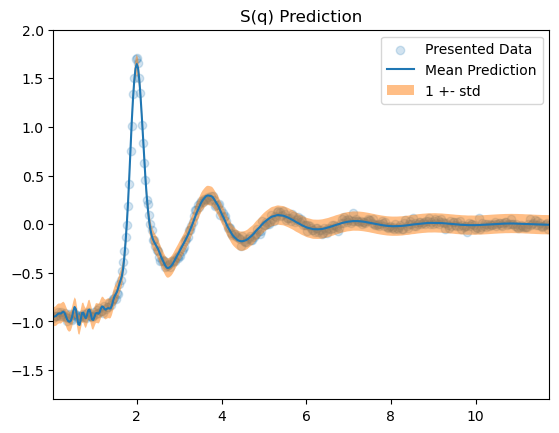

Average loss: -53.876784  [  160/  250]
l:       0.938904 
max:     2.202867 
slope:   6.046219 
loc:     3.533095 
decay:   0.484341 
sigma_n: 0.032370 
r_0:     3.449486 
s:       25.283588 
Minutes Taken Since Last Report: 0.534060 



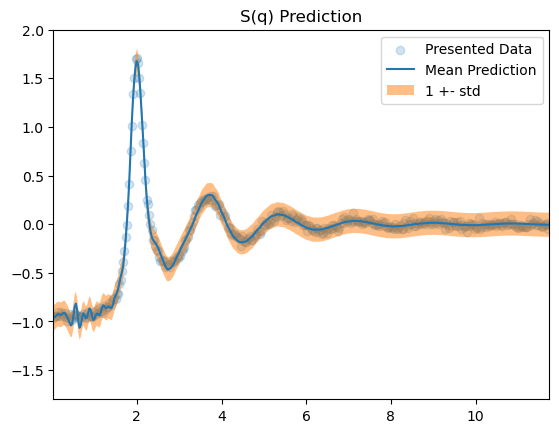

Average loss: -54.609324  [  170/  250]
l:       0.923383 
max:     2.206908 
slope:   6.115603 
loc:     3.531331 
decay:   0.482693 
sigma_n: 0.030520 
r_0:     3.451327 
s:       25.319660 
Minutes Taken Since Last Report: 0.529876 



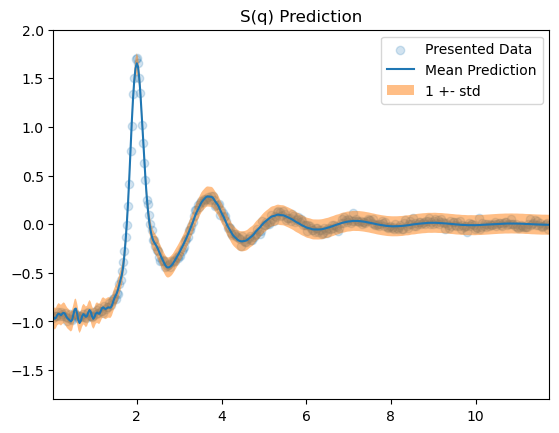

Average loss: -55.080750  [  180/  250]
l:       0.910152 
max:     2.209631 
slope:   6.183933 
loc:     3.529565 
decay:   0.481793 
sigma_n: 0.029200 
r_0:     3.452749 
s:       25.356289 
Minutes Taken Since Last Report: 0.525531 



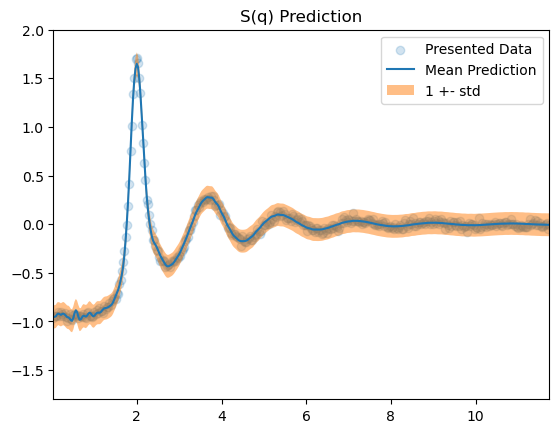

Average loss: -55.393032  [  190/  250]
l:       0.898946 
max:     2.211241 
slope:   6.250350 
loc:     3.527822 
decay:   0.481465 
sigma_n: 0.028262 
r_0:     3.453865 
s:       25.392902 
Minutes Taken Since Last Report: 0.529141 



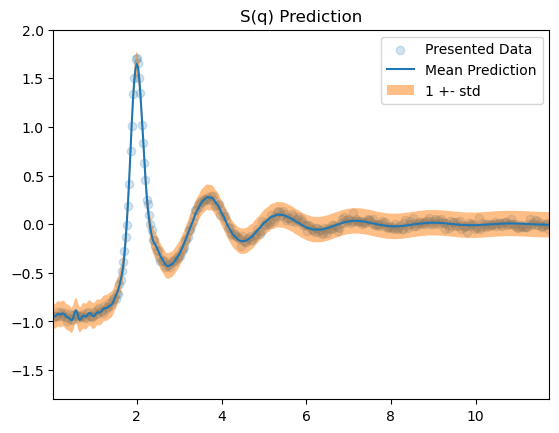

Average loss: -55.611416  [  200/  250]
l:       0.889532 
max:     2.211914 
slope:   6.314344 
loc:     3.526101 
decay:   0.481565 
sigma_n: 0.027591 
r_0:     3.454777 
s:       25.429096 
Minutes Taken Since Last Report: 0.549545 



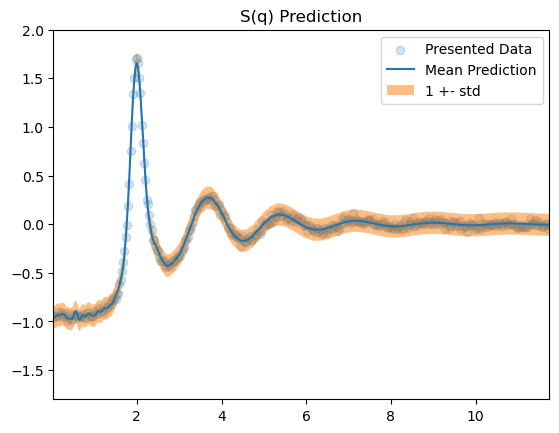

Average loss: -55.770352  [  210/  250]
l:       0.881647 
max:     2.211844 
slope:   6.375733 
loc:     3.524534 
decay:   0.481949 
sigma_n: 0.027111 
r_0:     3.455503 
s:       25.464636 
Minutes Taken Since Last Report: 0.528022 



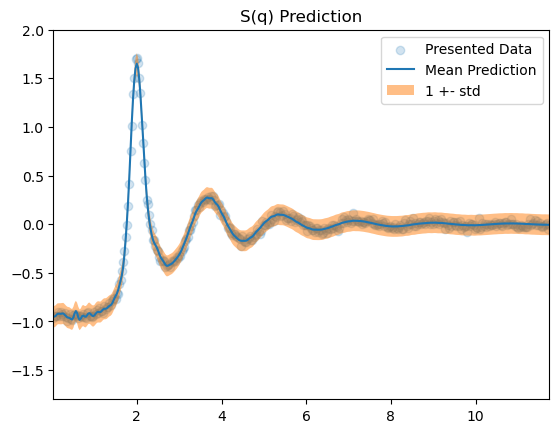

Average loss: -55.891428  [  220/  250]
l:       0.875061 
max:     2.211188 
slope:   6.434458 
loc:     3.523043 
decay:   0.482512 
sigma_n: 0.026763 
r_0:     3.456073 
s:       25.499378 
Minutes Taken Since Last Report: 0.522892 



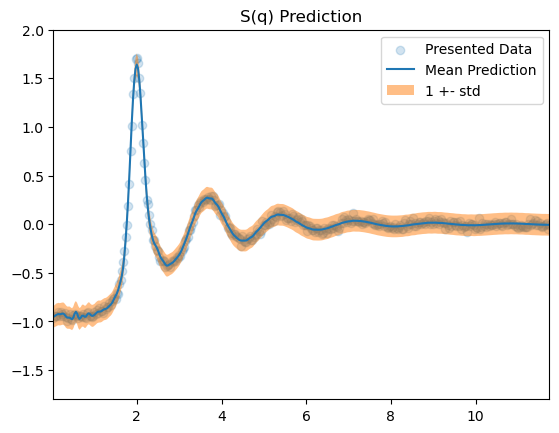

Average loss: -55.993571  [  230/  250]
l:       0.869577 
max:     2.210069 
slope:   6.490565 
loc:     3.521678 
decay:   0.483181 
sigma_n: 0.026507 
r_0:     3.456563 
s:       25.533239 
Minutes Taken Since Last Report: 0.544689 



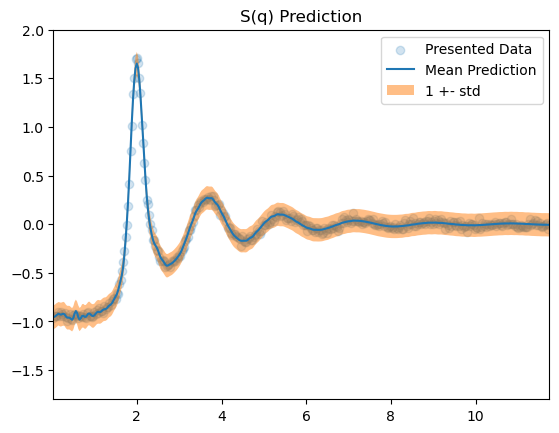

Average loss: -56.078206  [  240/  250]
l:       0.865014 
max:     2.208600 
slope:   6.544178 
loc:     3.520391 
decay:   0.483893 
sigma_n: 0.026317 
r_0:     3.456991 
s:       25.566210 
Minutes Taken Since Last Report: 0.529411 



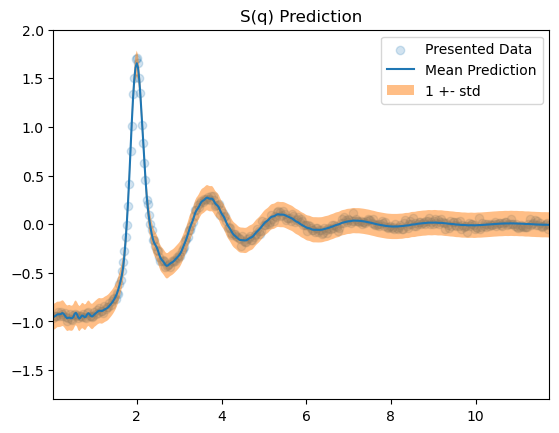

In [5]:
optimizer = torch.optim.SGD(gp.parameters(),lr=1e-4)
losses = gptransform.train_loop(dataset, gp, optimizer, 250, r_grid, q_train, sq_train, q_infer, r_infer, -1.8,2, -0.1,3.1)

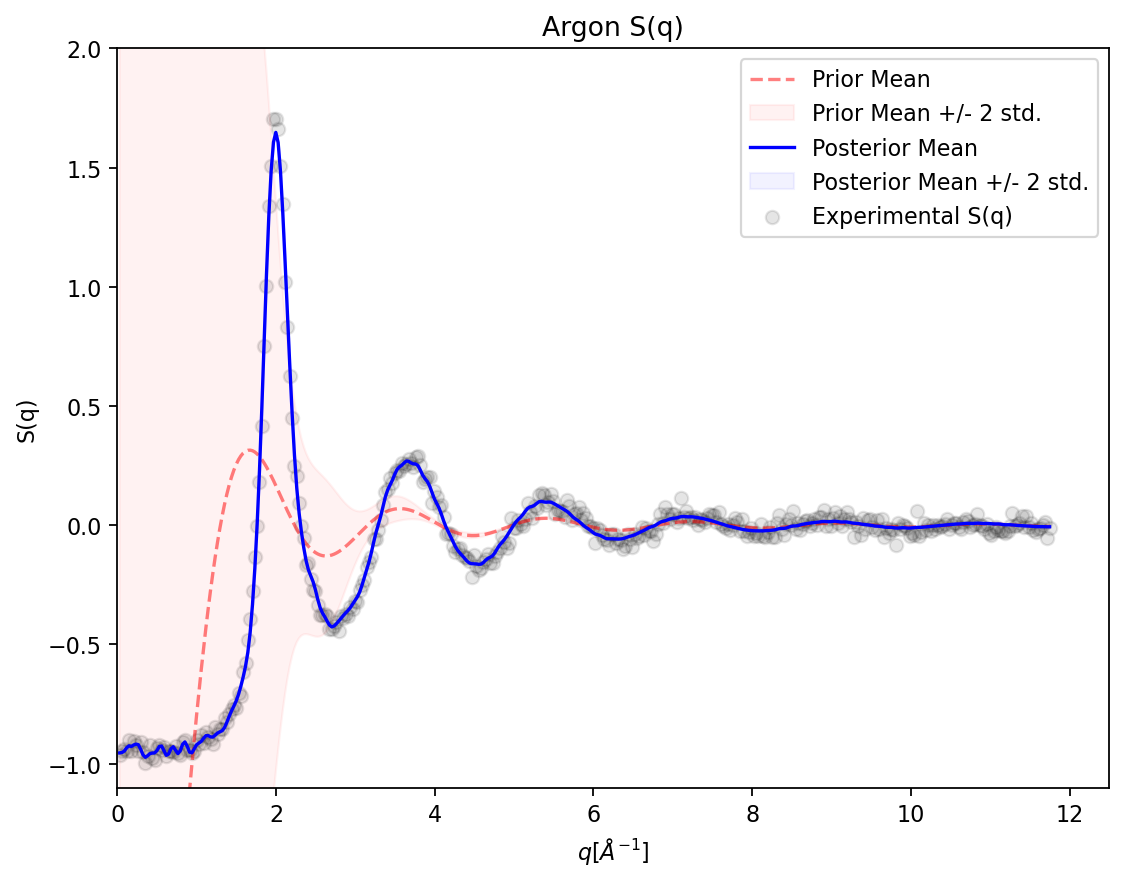

In [ ]:
with torch.no_grad():
    figure(figsize=(8, 6), dpi=160)

    # Calculate Prior Mean and Cov
    Σ_q_prior = gp.K_qq(r_grid,r_grid,q_infer,q_infer).detach()
    μ_q_prior = gp.mean_q(r_grid,q_infer).detach()

    # Calculate Posterior Mean and Cov
    μ_q_post, Σ_q_post = gp.predict_sq_trapz(r_grid, q_infer, q_train, sq_train,adjust=False)
    μ_q_post = μ_q_post.detach()
    Σ_q_post = Σ_q_post.detach()

    # Plot Prior
    plt.plot(q_infer.T[0],μ_q_prior.T[0],label="Prior Mean",linestyle='dashed',alpha=0.5,color='r')
    plt.fill_between(q_infer.T[0],μ_q_prior.T[0] + 2*torch.diag(Σ_q_prior), μ_q_prior.T[0] - 2*torch.diag(Σ_q_prior),alpha=0.05,label="Prior Mean +/- 2 std.",color='r')
    
    # Plot Posterior
    plt.plot(q_infer.T[0],μ_q_post.T[0],label="Posterior Mean",color='b')
    plt.fill_between(q_infer.T[0],μ_q_post.T[0] + 2*torch.diag(Σ_q_post), μ_q_post.T[0] - 2*torch.diag(Σ_q_post),alpha=0.05,label="Posterior Mean +/- 2 std.",color='b')

    # Experimental Data
    plt.scatter(q_train,sq_train,label='Experimental S(q)',alpha=0.1,color='k')

    # Plot Settings
    plt.xlim(0,12.5)
    plt.ylim(-1.1,2)
    plt.title('Argon S(q)')
    plt.xlabel('$q [Å^{-1}]$')
    plt.ylabel('S(q)')
    plt.legend()
    plt.savefig("figs/Ar_sq_post.png")

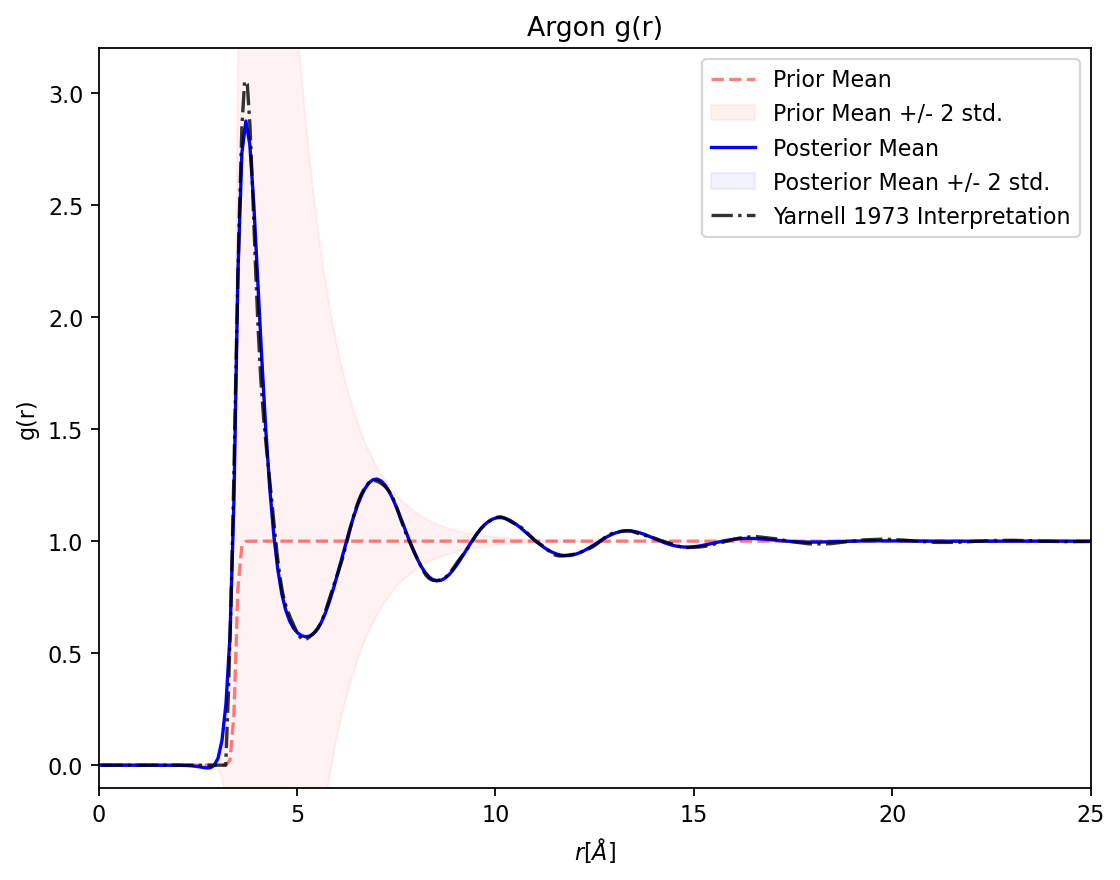

In [ ]:
with torch.no_grad():
    figure(figsize=(8, 6), dpi=160)

    # Calculate Prior Mean and Cov
    Σ_r_prior = gp.K_rr(r_infer,r_infer).detach()
    μ_r_prior = gp.mean_r(r_infer).detach()

    # Calculate Posterior Mean and Cov
    μ_r_post, Σ_r_post = gp.predict_rdf_trapz(r_grid, r_infer, q_train, sq_train,adjust=False)
    μ_r_post = μ_r_post.detach()
    Σ_r_post = Σ_r_post.detach()

    # Plot Prior
    plt.plot(r_infer.T[0],μ_r_prior.T[0],label="Prior Mean",linestyle='dashed',alpha=0.5,color='r')
    plt.fill_between(r_infer.T[0],μ_r_prior.T[0] + 2*torch.diag(Σ_r_prior), μ_r_prior.T[0] - 2*torch.diag(Σ_r_prior),alpha=0.05,label="Prior Mean +/- 2 std.",color='r')
    
    # Plot Posterior
    plt.plot(r_infer.T[0],μ_r_post.T[0],label="Posterior Mean",color='b')
    plt.fill_between(r_infer.T[0],μ_r_post.T[0] + 2*torch.diag(Σ_r_post), μ_r_post.T[0] - 2*torch.diag(Σ_r_post),alpha=0.05,label="Posterior Mean +/- 2 std.",color='b')

    # Yarnell
    plt.plot(r_reported,gr_reported,label='Yarnell 1973 Interpretation',alpha=0.8,color='k',linestyle='dashdot')

    # Plot Settings
    plt.ylim(-0.1,3.2)
    plt.xlim(0,25)
    plt.title('Argon g(r)')
    plt.xlabel('$r [Å]$')
    plt.ylabel('g(r)')
    plt.legend()
    plt.savefig("figs/Ar_gr_post.png")

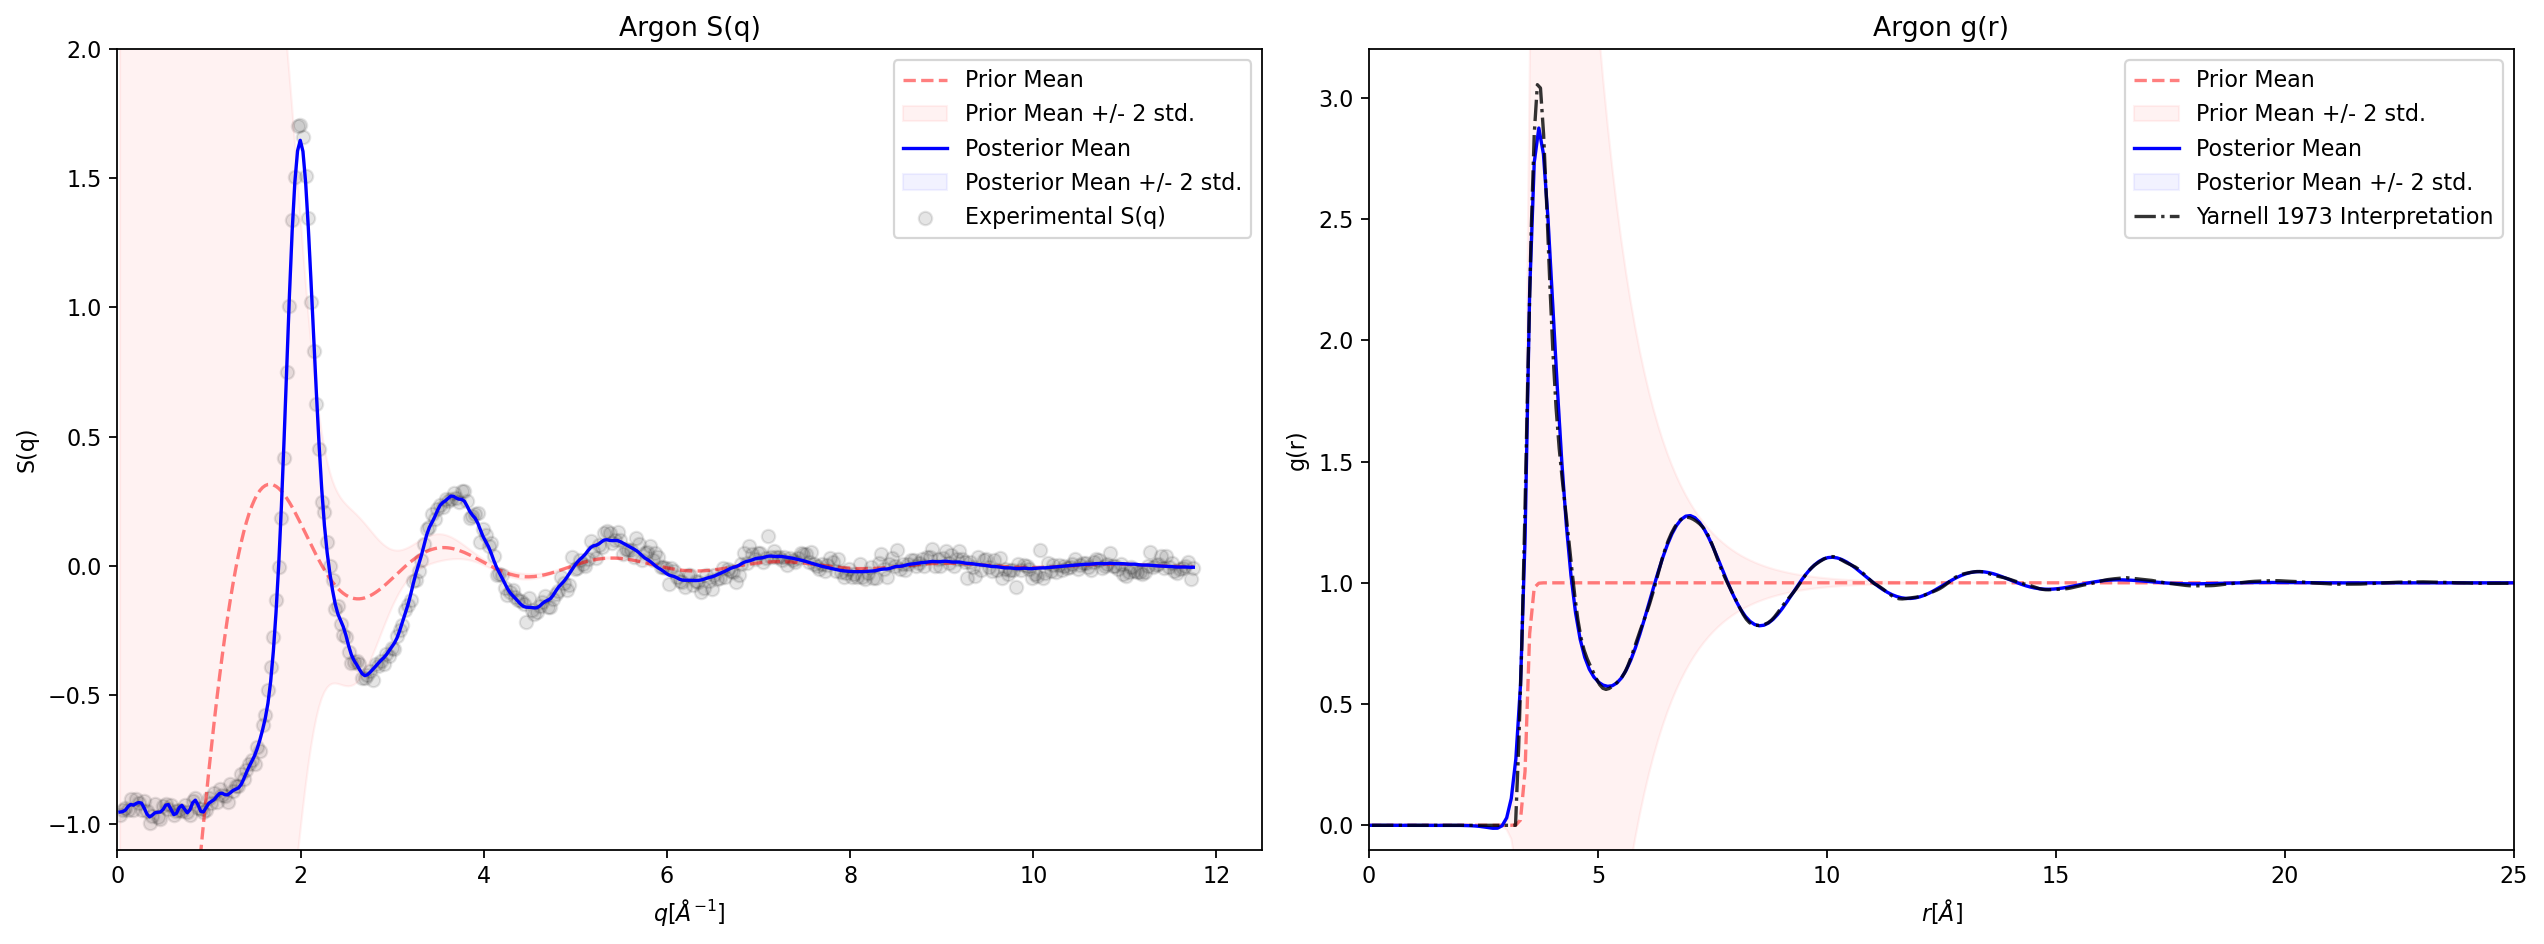

In [26]:
with torch.no_grad():
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=160)

    # First Plot: S(q)
    Σ_q_prior = gp.K_qq(r_grid,r_grid,q_infer,q_infer).detach()
    μ_q_prior = gp.mean_q(r_grid,q_infer).detach()
    μ_q_post, Σ_q_post = gp.predict_sq_trapz(r_grid, q_infer, q_train, sq_train,adjust=False)
    μ_q_post = μ_q_post.detach()
    Σ_q_post = Σ_q_post.detach()

    axs[0].plot(q_infer.T[0], μ_q_prior.T[0], label="Prior Mean", linestyle='dashed', alpha=0.5, color='r')
    axs[0].fill_between(q_infer.T[0], μ_q_prior.T[0] + 2*torch.diag(Σ_q_prior), μ_q_prior.T[0] - 2*torch.diag(Σ_q_prior), alpha=0.05, label="Prior Mean +/- 2 std.", color='r')
    axs[0].plot(q_infer.T[0], μ_q_post.T[0], label="Posterior Mean", color='b')
    axs[0].fill_between(q_infer.T[0], μ_q_post.T[0] + 2*torch.diag(Σ_q_post), μ_q_post.T[0] - 2*torch.diag(Σ_q_post), alpha=0.05, label="Posterior Mean +/- 2 std.", color='b')
    axs[0].scatter(q_train, sq_train, label='Experimental S(q)', alpha=0.1, color='k')
    axs[0].set_xlim(0, 12.5)
    axs[0].set_ylim(-1.1, 2)
    axs[0].set_title('Argon S(q)')
    axs[0].set_xlabel('$q [Å^{-1}]$')
    axs[0].set_ylabel('S(q)')
    axs[0].legend()

    # Second Plot: g(r)
    Σ_r_prior = gp.K_rr(r_infer,r_infer).detach()
    μ_r_prior = gp.mean_r(r_infer).detach()
    μ_r_post, Σ_r_post = gp.predict_rdf_trapz(r_grid, r_infer, q_train, sq_train,adjust=False)
    μ_r_post = μ_r_post.detach()
    Σ_r_post = Σ_r_post.detach()

    axs[1].plot(r_infer.T[0], μ_r_prior.T[0], label="Prior Mean", linestyle='dashed', alpha=0.5, color='r')
    axs[1].fill_between(r_infer.T[0], μ_r_prior.T[0] + 2*torch.diag(Σ_r_prior), μ_r_prior.T[0] - 2*torch.diag(Σ_r_prior), alpha=0.05, label="Prior Mean +/- 2 std.", color='r')
    axs[1].plot(r_infer.T[0], μ_r_post.T[0], label="Posterior Mean", color='b')
    axs[1].fill_between(r_infer.T[0], μ_r_post.T[0] + 2*torch.diag(Σ_r_post), μ_r_post.T[0] - 2*torch.diag(Σ_r_post), alpha=0.05, label="Posterior Mean +/- 2 std.", color='b')
    axs[1].plot(r_reported, gr_reported, label='Yarnell 1973 Interpretation', alpha=0.8, color='k', linestyle='dashdot')
    axs[1].set_ylim(-0.1, 3.2)
    axs[1].set_xlim(0, 25)
    axs[1].set_title('Argon g(r)')
    axs[1].set_xlabel('$r [Å]$')
    axs[1].set_ylabel('g(r)')
    axs[1].legend()

    plt.tight_layout()
    plt.savefig("figs/Ar_sq_gr_post.png")
    plt.show()

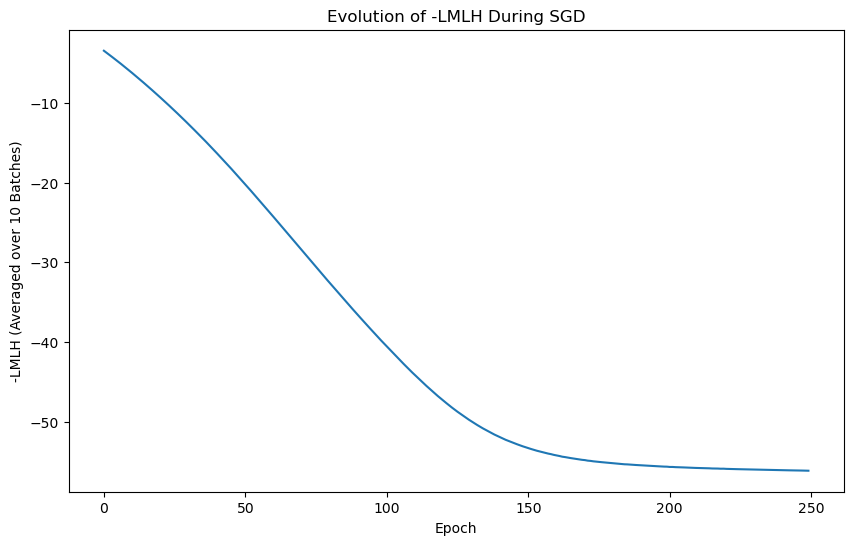

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(torch.tensor(losses).view(250, 10).mean(dim=1), linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('-LMLH (Averaged over 10 Batches)')
plt.title('Evolution of -LMLH During SGD')
plt.savefig('figs/Ar_LMLH.png')

TypeError: Dimensions of C (400, 300) should be one smaller than X(400) and Y(300) while using shading='flat' see help(pcolormesh)

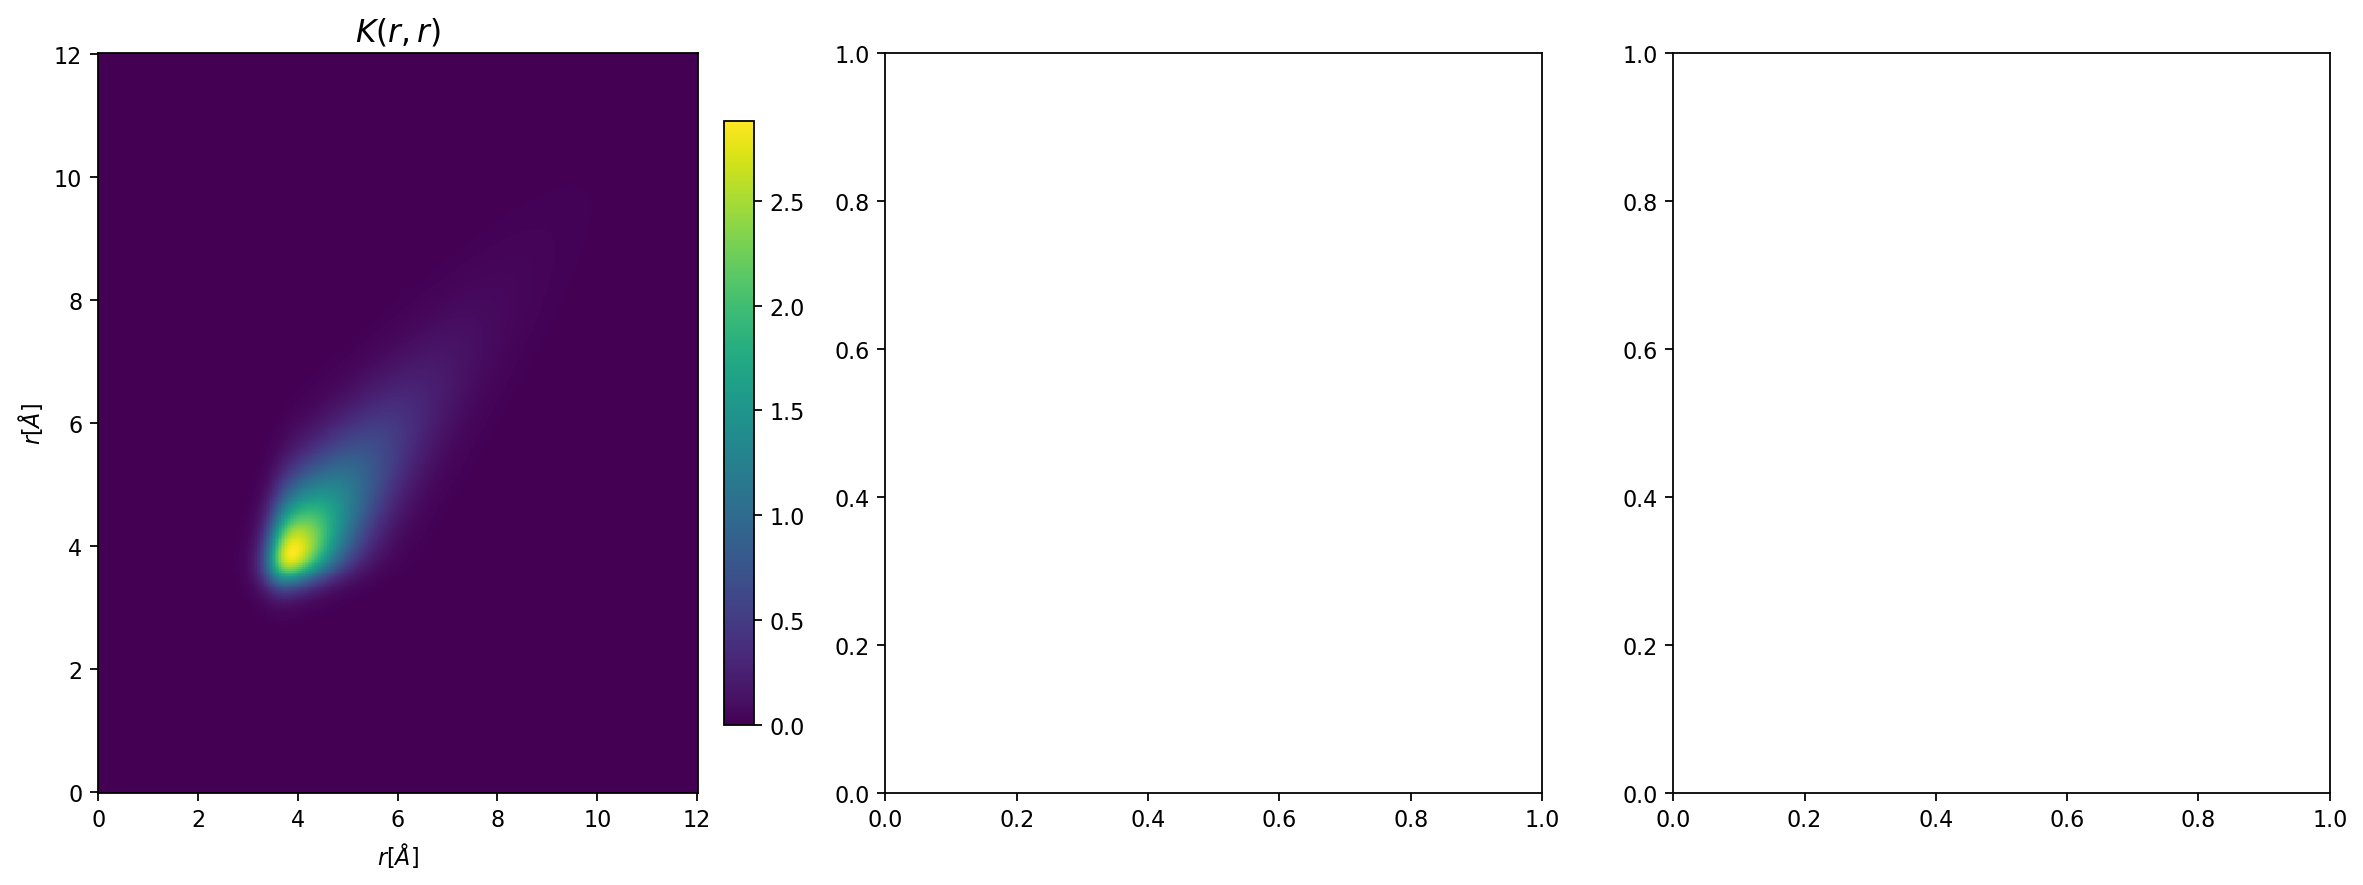

In [37]:
r_infer_k_plot = torch.linspace(0.0001, 12, 400).reshape(-1,1)
q_infer_k_plot = torch.linspace(0.0001, 3, 300).reshape(-1,1)

# Calculate kernel matrices for each domain
K1_matrix = gp.K_rr(r_infer_k_plot,r_infer_k_plot,adjust=False).detach()
K2_matrix = gp.K_rq(r_infer_k_plot,r_grid,q_infer_k_plot,adjust=False).detach()
K3_matrix = gp.K_qq(r_grid,r_grid,q_infer_k_plot,q_infer_k_plot,adjust=False).detach()

# Set up the figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=160)
kernels = [(K1_matrix, r_infer_k_plot.T[0], r_infer_k_plot.T[0]), (K2_matrix, r_infer_k_plot.T[0], q_infer_k_plot.T[0]), (K3_matrix, q_infer_k_plot.T[0], q_infer_k_plot.T[0])]
titles = ["$K(r,r)$", "$K(r,q)$", "$K(q,q)$"]
xlabels = ["$r [\AA]$", "$r [\AA]$", "$q [\AA^{-1}]$"]
ylabels = ["$r [\AA]$", "$q [\AA^{-1}]$", "$q [\AA^{-1}]$"]

# Plot each kernel matrix
for ax, (kernel, x_domain, y_domain), title,xlabel,ylabel in zip(axs, kernels, titles,xlabels,ylabels):
    c = ax.pcolormesh(x_domain.numpy(), y_domain.numpy(), kernel.numpy(), shading='auto', cmap="viridis")
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.colorbar(c, ax=ax, fraction=0.046, pad=0.04)

# Adjust layout and display
plt.tight_layout()
plt.savefig("figs/Ar_kernels.png")